data/train/003869.jpg
data/train/003869.png
Number of train images:  44071
Number of val images:  11018


  0%|          | 0/1378 [00:00<?, ?it/s]

Epoch/EpochNum | TrainLoss | ValidmIoU | Time(m)


100%|██████████| 1378/1378 [07:36<00:00,  3.02it/s]


0.972	0.85
    1/      20 |     0.128 |     0.911 |      8.86

  0%|          | 0/1378 [00:00<?, ?it/s]

  valid mIoU is improved. the model is saved.


100%|██████████| 1378/1378 [07:40<00:00,  2.99it/s]


0.974	0.864
    2/      20 |     0.088 |     0.919 |      8.59

  0%|          | 0/1378 [00:00<?, ?it/s]

  valid mIoU is improved. the model is saved.


100%|██████████| 1378/1378 [08:11<00:00,  2.80it/s]


0.974	0.866
    3/      20 |     0.086 |     0.920 |      9.09

  0%|          | 0/1378 [00:00<?, ?it/s]

  valid mIoU is improved. the model is saved.


100%|██████████| 1378/1378 [07:40<00:00,  2.99it/s]


0.975	0.872
    4/      20 |     0.079 |     0.923 |      8.58

  0%|          | 0/1378 [00:00<?, ?it/s]

  valid mIoU is improved. the model is saved.


100%|██████████| 1378/1378 [07:43<00:00,  2.97it/s]


0.977	0.88
    5/      20 |     0.072 |     0.928 |      8.63

  0%|          | 0/1378 [00:00<?, ?it/s]

  valid mIoU is improved. the model is saved.


100%|██████████| 1378/1378 [07:41<00:00,  2.99it/s]


0.978	0.884
    6/      20 |     0.066 |     0.931 |      8.61

  0%|          | 0/1378 [00:00<?, ?it/s]

  valid mIoU is improved. the model is saved.


  0%|          | 0/1378 [00:00<?, ?it/s]

0.975	0.87
    7/      20 |     0.074 |     0.923 |      8.57


  0%|          | 0/1378 [00:00<?, ?it/s]

0.976	0.876
    8/      20 |     0.072 |     0.926 |      8.58


  0%|          | 0/1378 [00:00<?, ?it/s]

0.977	0.875
    9/      20 |     0.069 |     0.926 |      8.58


  0%|          | 0/1378 [00:00<?, ?it/s]

0.976	0.878
   10/      20 |     0.065 |     0.927 |      8.52


100%|██████████| 1378/1378 [07:39<00:00,  3.00it/s]


0.978	0.885
   11/      20 |     0.062 |     0.932 |      8.58

  0%|          | 0/1378 [00:00<?, ?it/s]

  valid mIoU is improved. the model is saved.


100%|██████████| 1378/1378 [07:34<00:00,  3.03it/s]


0.979	0.888
   12/      20 |     0.059 |     0.933 |      8.50

  0%|          | 0/1378 [00:00<?, ?it/s]

  valid mIoU is improved. the model is saved.


100%|██████████| 1378/1378 [07:34<00:00,  3.03it/s]


0.979	0.89
   13/      20 |     0.057 |     0.934 |      8.49

  0%|          | 0/1378 [00:00<?, ?it/s]

  valid mIoU is improved. the model is saved.


100%|██████████| 1378/1378 [07:35<00:00,  3.02it/s]


0.979	0.891
   14/      20 |     0.055 |     0.935 |      8.52

  0%|          | 0/1378 [00:00<?, ?it/s]

  valid mIoU is improved. the model is saved.


  0%|          | 0/1378 [00:00<?, ?it/s]

0.977	0.875
   15/      20 |     0.065 |     0.926 |      8.52


  0%|          | 0/1378 [00:00<?, ?it/s]

0.977	0.879
   16/      20 |     0.064 |     0.928 |      8.52


  0%|          | 0/1378 [00:00<?, ?it/s]

0.977	0.879
   17/      20 |     0.062 |     0.928 |      8.54


  0%|          | 0/1378 [00:00<?, ?it/s]

0.977	0.883
   18/      20 |     0.061 |     0.930 |      8.51


  0%|          | 0/1378 [00:00<?, ?it/s]

0.978	0.886
   19/      20 |     0.059 |     0.932 |      8.51


100%|██████████| 1378/1378 [07:33<00:00,  3.04it/s]


0.978	0.887
   20/      20 |     0.058 |     0.933 |      8.49


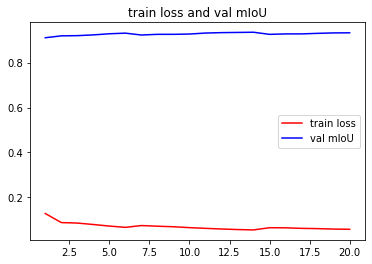

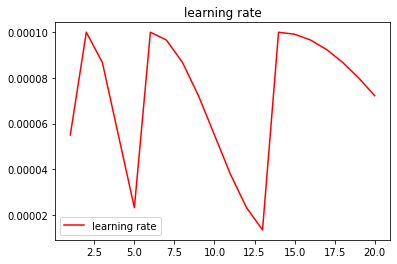

In [1]:
# -*- coding: utf-8 -*-
"""
@author: xinyi
ref:
1.https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12586969.1002.3.6cc26423Zxyf0s&postId=169396
2.https://github.com/DLLXW/data-science-competition/tree/main/%E5%A4%A9%E6%B1%A0
3.https://github.com/JasmineRain/NAIC_AI-RS/tree/ec70861e2a7f3ba18b3cc8bad592e746145088c9
"""
import numpy as np
import torch
import warnings
import time
from dataProcess import get_dataloader, cal_val_iou, split_train_val
import segmentation_models_pytorch as smp
import glob
from segmentation_models_pytorch.losses import DiceLoss, SoftCrossEntropyLoss, LovaszLoss
# from pytorch_toolbelt import losses as L
from tqdm import tqdm

## 使用自动混合精度训练，在尽可能减少精度损失的情况下利用半精度浮点数加速训练
#from torch.cuda.amp import autocast, GradScaler

# 忽略警告信息
warnings.filterwarnings('ignore')
# cuDNN使用的非确定性算法就会自动寻找最适合当前配置的高效算法，来达到优化运行效率的问题        
torch.backends.cudnn.enabled = True

# Tensor和Numpy都是矩阵,区别是前者可以在GPU上运行,后者只能在CPU上
# 但是Tensor和Numpy互相转化很方便
# 将模型加载到指定设备DEVICE上
DEVICE = 'cuda:0' if torch.cuda.is_available() else 'cpu' 


def train(EPOCHES, BATCH_SIZE, train_image_paths, train_label_paths, 
          val_image_paths, val_label_paths, channels, optimizer_name,
          model_path, early_stop):
    
    train_loader = get_dataloader(train_image_paths, train_label_paths, 
                                  "train", BATCH_SIZE, shuffle=True, num_workers=16)
    valid_loader = get_dataloader(val_image_paths, val_label_paths, 
                                  "val", BATCH_SIZE, shuffle=False, num_workers=16)
    
    # for batch_index, (image, target) in enumerate(tqdm(train_loader)):
    #     print(batch_index)
    
    # 定义型,优化器,损失函数
    #model = smp.UnetPlusPlus(
    #        encoder_name="resnet18",# efficient net  b7
     #       encoder_weights="imagenet",
   #         in_channels=channels,
   #         decoder_attention_type="scse",# None
   #         classes=4,#2
   # )
    
    # #----- unet
    #model = smp.Unet(
    #         encoder_name="resnet18",# efficient net  b7
    #         encoder_weights="imagenet",
     #        in_channels=channels,
    #         decoder_attention_type="scse",# None
    #         classes=4,#2
    #)
    # #----- deeplab
    model = smp.DeepLabV3Plus(
             encoder_name="resnet18",# efficient net  b7
             encoder_weights="imagenet",
             in_channels=channels,
             classes=2,#2
    )
    model.to(DEVICE);
    
    # 采用AdamM优化器
    optimizer = torch.optim.AdamW(model.parameters(),
                                  lr=1e-4, weight_decay=1e-3)
    # 余弦退火调整学习率
    scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
            optimizer, 
            T_0=2, # T_0就是初始restart的epoch数目
            T_mult=2, # T_mult就是重启之后因子,即每个restart后，T_0 = T_0 * T_mult
            eta_min=1e-5 # 最低学习率
            )
    
    # 损失函数采用SoftCrossEntropyLoss+DiceLoss
    # diceloss在一定程度上可以缓解类别不平衡,但是训练容易不稳定
    # DiceLoss_fn=DiceLoss(mode='multiclass')
    # # 软交叉熵,即使用了标签平滑的交叉熵,会增加泛化性
    # SoftCrossEntropy_fn=SoftCrossEntropyLoss(smooth_factor=0.1)
    # loss_fn = L.JointLoss(first=DiceLoss_fn, second=SoftCrossEntropy_fn,
    #                       first_weight=0.5, second_weight=0.5).cuda()
    loss_fn = DiceLoss(mode='multiclass')
    header = r'Epoch/EpochNum | TrainLoss | ValidmIoU | Time(m)'
    raw_line = r'{:5d}/{:8d} | {:9.3f} | {:9.3f} | {:9.2f}'
    print(header)

    # 记录当前验证集最优mIoU,以判定是否保存当前模型
    best_miou = 0
    best_miou_epoch = 0
    train_loss_epochs, val_mIoU_epochs, lr_epochs = [], [], []
    # 开始训练
    for epoch in range(1, EPOCHES+1):
        # 存储训练集每个batch的loss
        losses = []
        start_time = time.time()
        model.train()
        model.to(DEVICE);
        for batch_index, (image, target) in enumerate(tqdm(train_loader)):
            
            image, target = image.to(DEVICE), target.to(DEVICE)
            # 在反向传播前要手动将梯度清零
            optimizer.zero_grad()
            # 模型推理得到输出
            output = model(image)
            # 求解该batch的loss
            loss = loss_fn(output, target)
            # 反向传播求解梯度
            loss.backward()
            # 更新权重参数
            optimizer.step()
            losses.append(loss.item())
        scheduler.step()
        # 计算验证集IoU
        val_iou = cal_val_iou(model, valid_loader)
        # 输出每一类IoU
        print("\t".join(np.stack(val_iou).mean(0).round(3).astype(str)))
        # 保存当前epoch的train_loss.val_mIoU.lr_epochs
        train_loss_epochs.append(np.array(losses).mean())
        val_mIoU_epochs.append(np.mean(val_iou))
        lr_epochs.append(optimizer.param_groups[0]['lr'])
        # 输出进程
        print(raw_line.format(epoch, EPOCHES, np.array(losses).mean(), 
                              np.mean(val_iou), 
                              (time.time()-start_time)/60**1), end="")    
        if best_miou < np.stack(val_iou).mean(0).mean():
            best_miou = np.stack(val_iou).mean(0).mean()
            best_miou_epoch = epoch
            torch.save(model.state_dict(), model_path)
            model_path_full = 'modelfull.pth'
            torch.save(model, model_path_full)
            print("  valid mIoU is improved. the model is saved.")
        else:
            print("")
            if (epoch - best_miou_epoch) >= early_stop:
                break
    return train_loss_epochs, val_mIoU_epochs, lr_epochs
    
# 不加主函数这句话的话,Dataloader多线程加载数据会报错
if __name__ == '__main__':
    EPOCHES = 20
    BATCH_SIZE = 32
    image_paths = glob.glob(r'data/train/*.jpg')
    label_paths = []
    for i in range(len(image_paths)):
        label_paths.append(image_paths[i].replace("jpg","png"))
    print(image_paths[0])
    print(label_paths[0])

    #label_paths = glob.glob(r'data/train/*.png')
    # 每5个数据的第val_index个数据为验证集
    val_index = 0
    upsample = True
    train_image_paths, train_label_paths, val_image_paths, val_label_paths = split_train_val(image_paths, 
                                                                                             label_paths, 
                                                                                             val_index)
    channels = 3

    optimizer_name = "adamw"
    model_path = "./model/deeplabv3+.pth"
    early_stop = 100
    train_loss_epochs, val_mIoU_epochs, lr_epochs = train(EPOCHES, 
                                                          BATCH_SIZE, 
                                                          train_image_paths, 
                                                          train_label_paths, 
                                                          val_image_paths, 
                                                          val_label_paths, 
                                                          channels, 
                                                          optimizer_name,
                                                          model_path,
                                                          early_stop)
    
    if(True):    
        import matplotlib.pyplot as plt
    EPOCHES = 100

    epochs = range(1, len(train_loss_epochs) + 1)
    plt.plot(epochs, train_loss_epochs, 'r', label = 'train loss')
    plt.plot(epochs, val_mIoU_epochs, 'b', label = 'val mIoU')
    plt.title('train loss and val mIoU')
    plt.legend()
    plt.savefig(r"../plt/train loss and val mIoU.png",dpi = 300)
    plt.figure()
    plt.plot(epochs, lr_epochs, 'r', label = 'learning rate')
    plt.title('learning rate')
    plt.legend()
    plt.savefig(r"../plt/learning rate.png", dpi = 300)
    plt.show() 